In [1]:
!pip install pandas numpy scipy matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [3]:
df = pd.read_csv('/content/control_group.csv')

In [15]:
df = pd.read_csv(file_path, sep=';')

In [16]:
print(df.head())

      Campaign Name       Date  Spend [USD]  # of Impressions     Reach  \
0  Control Campaign  1.08.2019         2280           82702.0   56930.0   
1  Control Campaign  2.08.2019         1757          121040.0  102513.0   
2  Control Campaign  3.08.2019         2343          131711.0  110862.0   
3  Control Campaign  4.08.2019         1940           72878.0   61235.0   
4  Control Campaign  5.08.2019         1835               NaN       NaN   

   # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0               7016.0         2290.0             2159.0            1819.0   
1               8110.0         2033.0             1841.0            1219.0   
2               6508.0         1737.0             1549.0            1134.0   
3               3065.0         1042.0              982.0            1183.0   
4                  NaN            NaN                NaN               NaN   

   # of Purchase  
0          618.0  
1          511.0  
2          372.0  
3   

In [17]:
print(df.info())  # Checking for null values and data types
print(df.describe())  # Descriptive statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB
None
       Spend [USD]  # of Impressions          Reach  # of Website Clicks  \
count    30.000000         29.000000      29.000000            29.000000   
mean   2288.433333     109559.758621   88844.931034          5320.793103   
st

In [18]:
df.dropna(inplace=True)

In [20]:
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

In [21]:
print(df.describe())

                                Date  Spend [USD]  # of Impressions  \
count                             29    29.000000         29.000000   
mean   2019-08-15 20:41:22.758620672  2304.068966     109559.758621   
min              2019-08-01 00:00:00  1757.000000      71274.000000   
25%              2019-08-09 00:00:00  1962.000000      92029.000000   
50%              2019-08-16 00:00:00  2319.000000     113430.000000   
75%              2019-08-23 00:00:00  2544.000000     121332.000000   
max              2019-08-30 00:00:00  3083.000000     145248.000000   
std                              NaN   363.534822      21688.922908   

               Reach  # of Website Clicks  # of Searches  # of View Content  \
count      29.000000            29.000000      29.000000          29.000000   
mean    88844.931034          5320.793103    2221.310345        1943.793103   
min     42859.000000          2277.000000    1001.000000         848.000000   
25%     74192.000000          4085.000000   

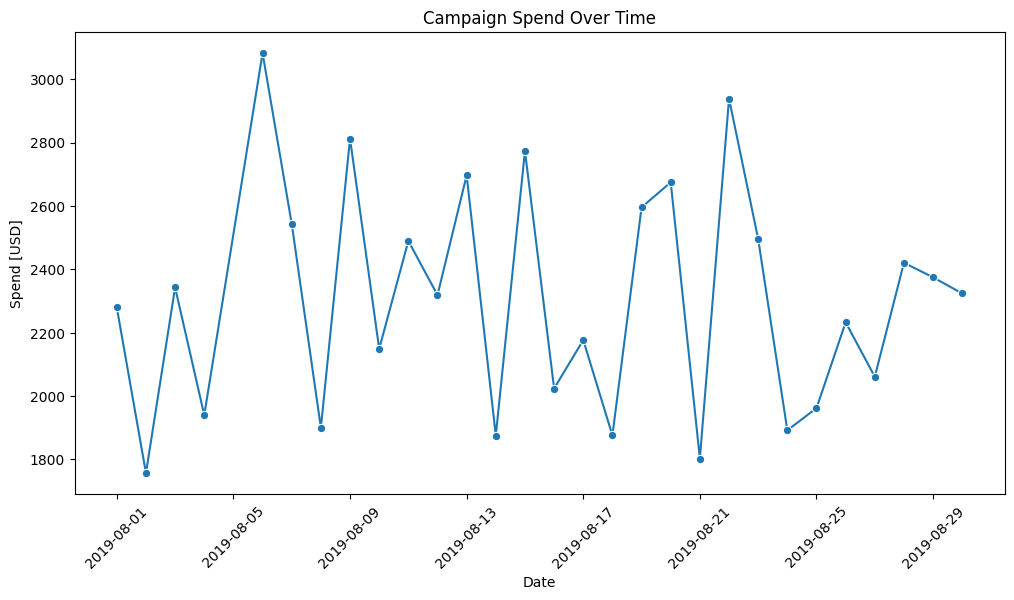

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Spend [USD]', data=df, marker='o')
plt.title('Campaign Spend Over Time')
plt.xlabel('Date')
plt.ylabel('Spend [USD]')
plt.xticks(rotation=45)
plt.show()

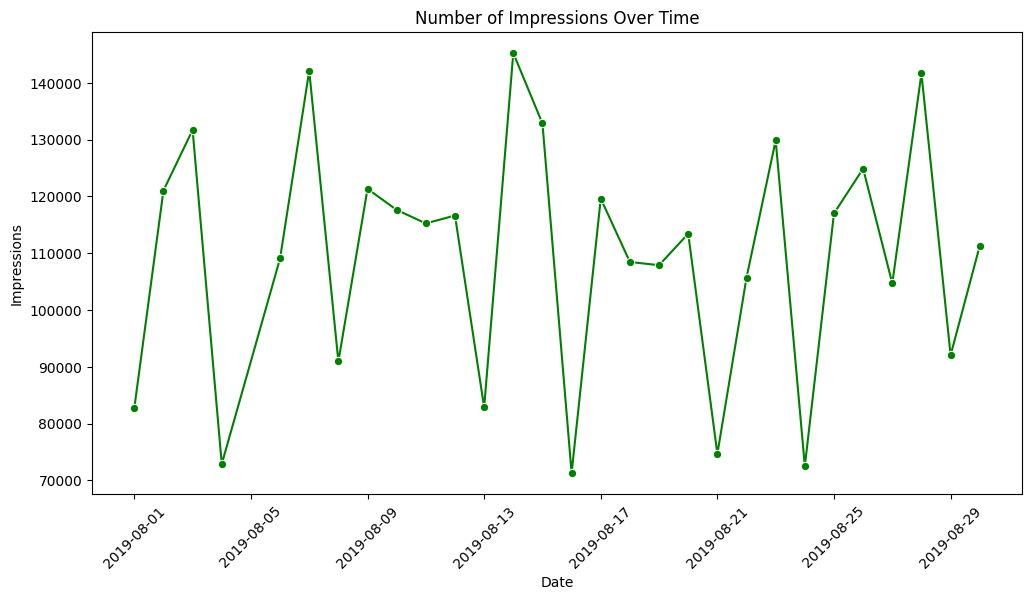

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='# of Impressions', data=df, marker='o', color='green')
plt.title('Number of Impressions Over Time')
plt.xlabel('Date')
plt.ylabel('Impressions')
plt.xticks(rotation=45)
plt.show()

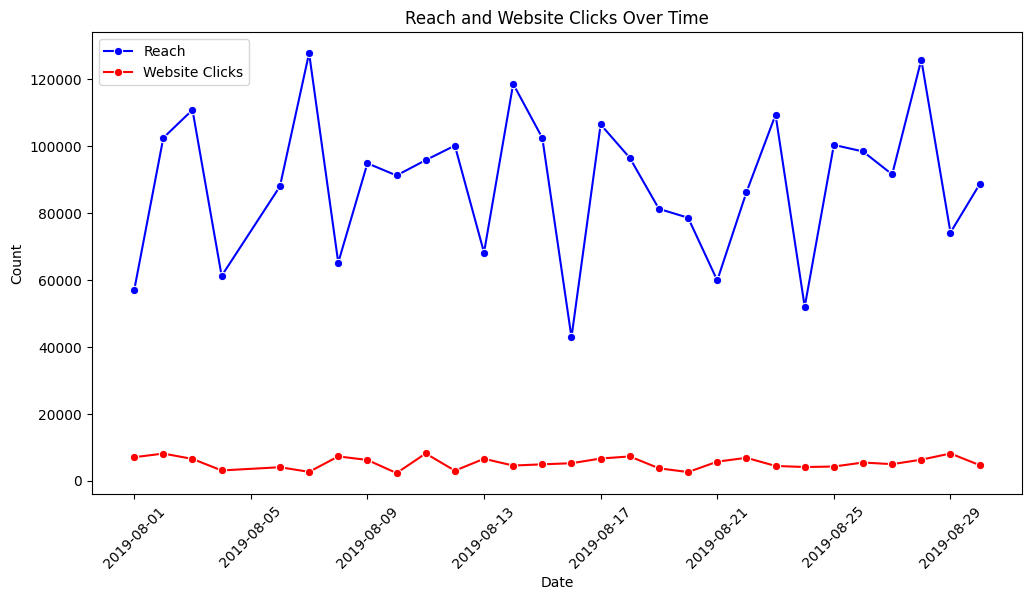

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Reach', data=df, marker='o', label='Reach', color='blue')
sns.lineplot(x='Date', y='# of Website Clicks', data=df, marker='o', label='Website Clicks', color='red')
plt.title('Reach and Website Clicks Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [25]:
df['CTR'] = df['# of Website Clicks'] / df['# of Impressions']  # Click-Through Rate (CTR)
df['Conversion Rate'] = df['# of Purchase'] / df['# of Website Clicks']  # Conversion Rate


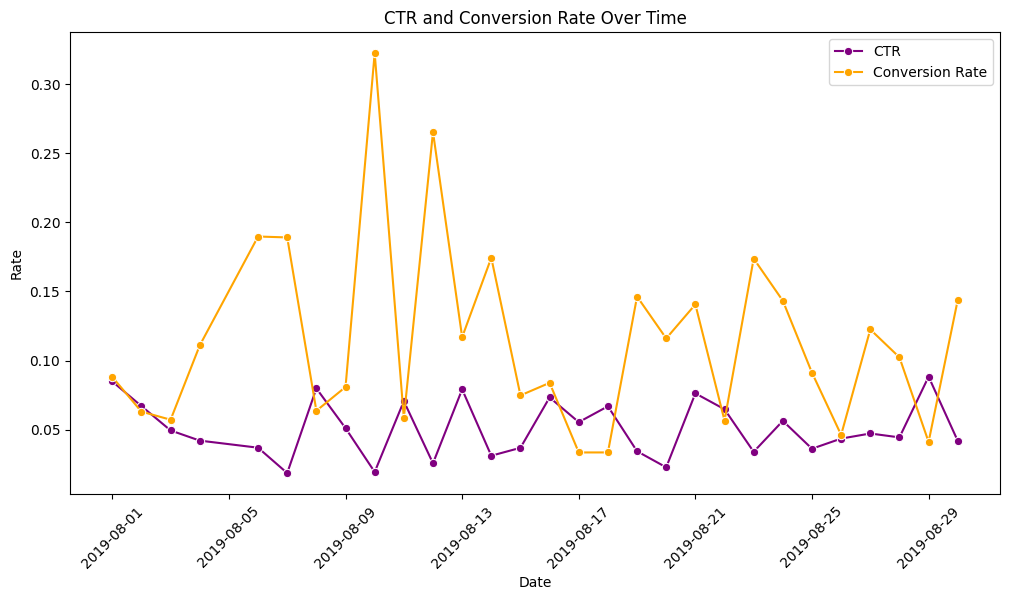

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='CTR', data=df, marker='o', label='CTR', color='purple')
sns.lineplot(x='Date', y='Conversion Rate', data=df, marker='o', label='Conversion Rate', color='orange')
plt.title('CTR and Conversion Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [27]:
print("Summary Statistics for CTR and Conversion Rate:")
print(df[['CTR', 'Conversion Rate']].describe())


Summary Statistics for CTR and Conversion Rate:
             CTR  Conversion Rate
count  29.000000        29.000000
mean    0.050959         0.114772
std     0.020508         0.068383
min     0.018575         0.033494
25%     0.036186         0.063009
50%     0.047202         0.102275
75%     0.067003         0.143839
max     0.088309         0.322354
